# 6.3 U.S.A Real Estate - Geographical Visualizations - Choropleth

### This script contains the following:
#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth

### 1. Import data and libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
%matplotlib inline

In [3]:
# Import ".json" file for the U.S. 
country_geo = r'/Users/nancykray/Desktop/CF-Data Immersion/6 Advanced Analytics/us-states.json'

In [4]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'/Users/nancykray/Desktop/CF-Data Immersion/6 Advanced Analytics/us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [5]:
# import path
path = r'/Users/nancykray/Desktop/Real Estate Project'


In [6]:
# Import clean real estate data

df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'df_clean6.pkl'))

In [7]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.000,0,Middle price
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.000,0,Low price
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.000,0,Low price
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.000,0,Middle price
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,2715.133,0,Low price


In [8]:
df.shape

(2217918, 13)

### 2. Data wrangling 

#### I do not have any dummy columns to adjust so I will move on to Consistency checks:
#### Missing Values check:

In [9]:
#look at the columns to see if we need to eliminate any columns for choropleth
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date',
       'Price category'],
      dtype='object')

In [10]:
#check missing values (no missings!)
df.isnull().sum()

brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
Price category    0
dtype: int64

#### Duplicates check:

In [11]:
#duplicates check (no duplicates!)
dups = df.duplicated()
dups.shape

(2217918,)

#### Extreme values check:

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

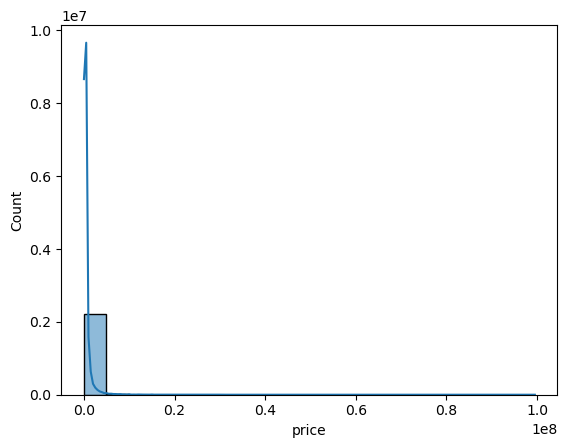

In [12]:
sns.histplot(df['price'], bins=20, kde = True) # shows extreme values for 'price'

In [13]:
# Check how many extreme values over $20 million (1035 homes!)

df[df['price'] >20000000]


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category
857,108464.0,for_sale,25000000.0,3.275919,2.496373,100.00,1946190.0,Isabela,Puerto Rico,662.0,2715.133,0,High price
2464,34543.0,for_sale,23000000.0,3.275919,2.496373,130.00,1987434.0,Saint Thomas,Virgin Islands,802.0,2715.133,0,High price
2602,34543.0,for_sale,22500000.0,3.275919,2.496373,744.00,1987436.0,Christiansted,Virgin Islands,820.0,2715.133,0,High price
2727,22968.0,for_sale,24500000.0,3.275919,2.496373,618.36,1949383.0,Christiansted,Virgin Islands,820.0,2715.133,0,High price
7055,80750.0,for_sale,60000000.0,9.000000,10.000000,400.00,1246311.0,Woodstock,Connecticut,6281.0,18777.000,2003-08-28,High price
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149896,92886.0,sold,29750000.0,6.000000,8.000000,1.50,982753.0,Pebble Beach,California,93953.0,7650.000,2022-02-14,High price
2149969,18294.0,sold,28500000.0,5.000000,8.000000,1.44,375280.0,Pebble Beach,California,93953.0,8232.000,2022-02-28,High price
2150173,16829.0,sold,29000000.0,6.000000,6.000000,7.18,491448.0,Carmel,California,93923.0,4335.000,2022-03-30,High price
2173227,20188.0,sold,38500000.0,15.000000,18.000000,26.00,551610.0,Glenbrook,Nevada,89413.0,20377.000,2022-03-15,High price


In [14]:
#check how many are over $10 million (3934 homes!)
df[df['price'] >10000000]

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category
255,102909.0,for_sale,11500000.0,4.000000,5.000000,1.98,974575.0,Dorado,Puerto Rico,646.0,7000.000,0,High price
378,82827.0,for_sale,12000000.0,4.000000,7.000000,0.37,1189423.0,Dorado,Puerto Rico,646.0,7096.000,0,High price
384,77432.0,for_sale,16000000.0,4.000000,7.000000,0.75,955260.0,Dorado,Puerto Rico,646.0,7000.000,0,High price
580,88441.0,for_sale,15000000.0,3.000000,3.000000,0.26,604394.0,Dorado,Puerto Rico,646.0,4265.000,0,High price
587,55906.0,for_sale,15000000.0,6.000000,7.000000,0.36,1092824.0,Dorado,Puerto Rico,646.0,6500.000,0,High price
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196749,108370.0,sold,15000000.0,3.275919,2.496373,0.24,1203618.0,Seattle,Washington,98102.0,2715.133,2021-12-08,High price
2197090,16829.0,sold,10800000.0,5.000000,6.000000,0.35,1790274.0,Clyde Hill,Washington,98004.0,7360.000,2022-01-28,High price
2201527,94428.0,sold,11975000.0,15.000000,18.000000,1.10,383232.0,Bothell,Washington,98012.0,41146.000,2021-12-17,High price
2206973,16829.0,sold,12901148.0,3.275919,2.496373,0.70,603675.0,Seattle,Washington,98112.0,10900.000,2021-11-08,High price


In [15]:
# set the dataframe to eliminate these extreme values
df=df[df['price'] <10000000]

In [16]:
#check that this worked, that all houses in df are below $10 million 
df['price'].max()

9999999.0

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

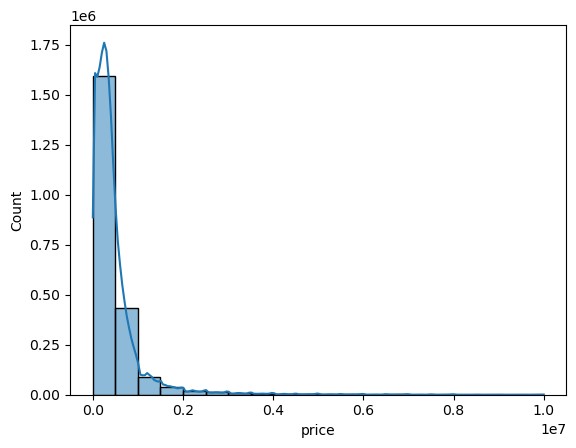

In [17]:
sns.histplot(df['price'], bins=20, kde = True) # shows extreme values for 'price'

##### check extreme values for bed

In [18]:
df['bed'].max()

473.0

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bed', ylabel='Count'>

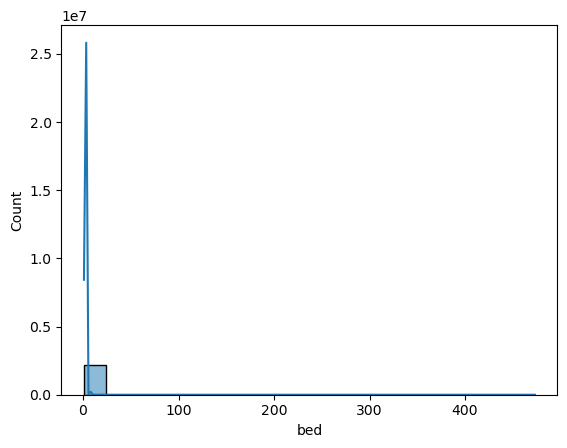

In [19]:
sns.histplot(df['bed'], bins=20, kde = True) # shows extreme values for 'bed'

<Axes: ylabel='bed'>

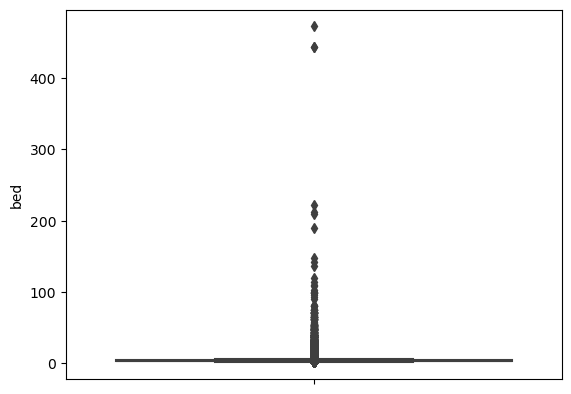

In [20]:
#lets look at the boxplot of this -makes the outlier value more clear (above 400)
sns.boxplot(y='bed', data=df)

In [21]:
# find extreme values over 400 beds
df[df['bed'] >400]

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category
582404,21069.0,for_sale,225000.0,473.0,157.0,0.26,975782.0,Brent,Alabama,35034.0,2715.133,0,Middle price
1377808,54823.0,for_sale,440000.0,444.0,222.0,0.34,118525.0,Sublimity,Oregon,97385.0,1700.000,1990-08-15,Middle price
2184406,54823.0,sold,430000.0,444.0,222.0,0.34,118525.0,Sublimity,Oregon,97385.0,1700.000,2022-04-29,Middle price


In [22]:
#clean these extreme values (to have less than 400 beds)
df=df[df['bed'] <400]

In [23]:
#make sure none exceed 400
df['bed'].max()

222.0

##### extreme values for bath

<Axes: ylabel='bath'>

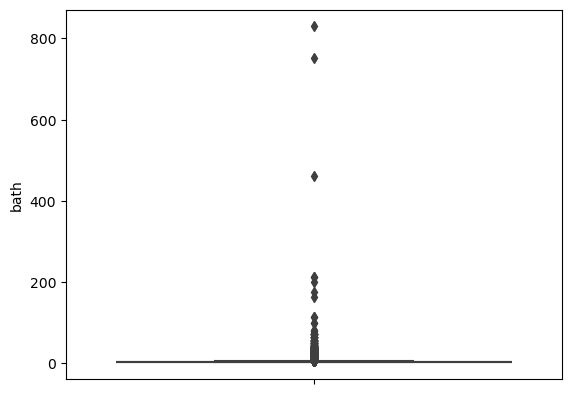

In [24]:
sns.boxplot(y='bath', data=df)

In [25]:
# find extreme values over 400 baths
df[df['bath'] >400]

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category
862584,67437.0,for_sale,129000.0,5.0,752.0,0.27,1698734.0,Ottawa,Illinois,61350.0,2715.133,0,Middle price
1161333,22213.0,for_sale,410000.0,1.0,460.0,0.26,312306.0,Mountain Village,Colorado,81435.0,459.000,2017-05-24,Middle price
1377200,65903.0,for_sale,699000.0,222.0,830.0,0.34,541082.0,Dallas,Oregon,97338.0,2715.133,2006-04-10,High price


In [26]:
#clean these extreme values (to have less than 400 baths)
df=df[df['bath'] <400]

In [27]:
#make sure executed correctly
df['bath'].max()

212.0

##### extreme values for acre_lot

In [28]:
df['acre_lot'].max()

100000.0

<Axes: ylabel='acre_lot'>

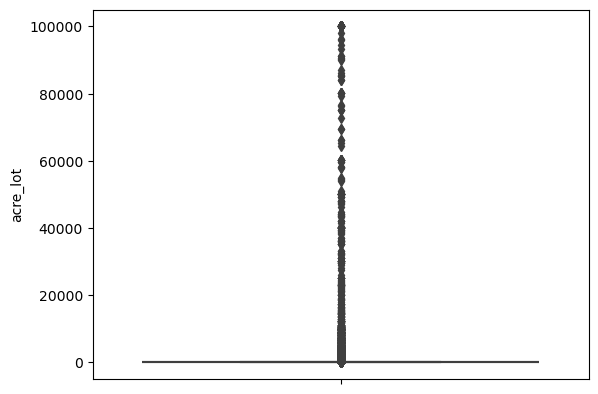

In [29]:
sns.boxplot(y='acre_lot', data=df)

In [30]:
# Check how many extreme values acre_lot over 60,000

df[df['acre_lot'] >40000]


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category
3300,88715.0,for_sale,585000.0,4.000000,4.000000,100000.0,1930360.0,San Juan,Puerto Rico,926.0,3300.000,0,High price
5260,10554.0,for_sale,150000.0,3.275919,2.496373,99999.0,595393.0,Simsbury,Connecticut,6070.0,2715.133,0,Middle price
9186,10560.0,for_sale,5700000.0,3.275919,2.496373,99999.0,1106245.0,Middletown,Connecticut,6457.0,99999.000,0,High price
32652,82261.0,for_sale,129000.0,2.000000,1.000000,100000.0,598202.0,Whitehall,New York,12887.0,1352.000,0,Middle price
37626,91618.0,for_sale,264900.0,3.000000,2.000000,99999.0,1137811.0,Montville,Connecticut,6353.0,1485.000,0,Middle price
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095341,53175.0,sold,110000.0,3.000000,2.000000,100000.0,287316.0,El Cajon,California,92021.0,1680.000,2022-03-22,Middle price
2095482,22611.0,sold,795000.0,4.000000,3.000000,47915.0,1538913.0,San Diego,California,92115.0,1872.000,2022-03-29,High price
2100617,16675.0,sold,389000.0,4.000000,2.000000,49312.0,1738082.0,Phelan,California,92371.0,1914.000,2022-05-03,Middle price
2107873,18750.0,sold,699999.0,5.000000,3.000000,91040.0,908567.0,Menifee,California,92585.0,3076.000,2022-04-07,High price


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='acre_lot', ylabel='Count'>

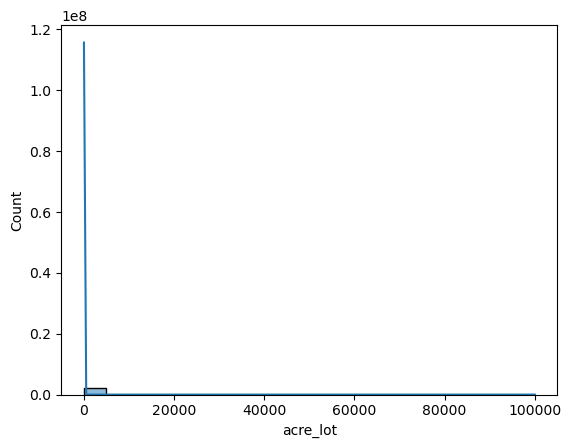

In [31]:
sns.histplot(df['acre_lot'], bins=20, kde = True) # shows extreme values for 'acre_lot'

In [32]:
# Check how many extreme values acre_lot over 60,000

df[df['acre_lot'] >20000]


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category
3300,88715.0,for_sale,585000.0,4.000000,4.000000,100000.0,1930360.0,San Juan,Puerto Rico,926.0,3300.000,0,High price
5260,10554.0,for_sale,150000.0,3.275919,2.496373,99999.0,595393.0,Simsbury,Connecticut,6070.0,2715.133,0,Middle price
9186,10560.0,for_sale,5700000.0,3.275919,2.496373,99999.0,1106245.0,Middletown,Connecticut,6457.0,99999.000,0,High price
32652,82261.0,for_sale,129000.0,2.000000,1.000000,100000.0,598202.0,Whitehall,New York,12887.0,1352.000,0,Middle price
37626,91618.0,for_sale,264900.0,3.000000,2.000000,99999.0,1137811.0,Montville,Connecticut,6353.0,1485.000,0,Middle price
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100617,16675.0,sold,389000.0,4.000000,2.000000,49312.0,1738082.0,Phelan,California,92371.0,1914.000,2022-05-03,Middle price
2107873,18750.0,sold,699999.0,5.000000,3.000000,91040.0,908567.0,Menifee,California,92585.0,3076.000,2022-04-07,High price
2116080,15623.0,sold,975000.0,5.000000,4.000000,20003.0,364211.0,Santa Paula,California,93060.0,3407.000,2022-01-04,High price
2118706,53081.0,sold,399000.0,3.000000,2.000000,39077.0,1250202.0,Quartz Hill,California,93536.0,1239.000,2022-04-12,Middle price


In [33]:
#eliminate these extreme values for acre_lot
df=df[df['acre_lot']<20000]

In [34]:
#check it
df['acre_lot'].max()

19925.0

##### extreme values for house_size

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='house_size', ylabel='Count'>

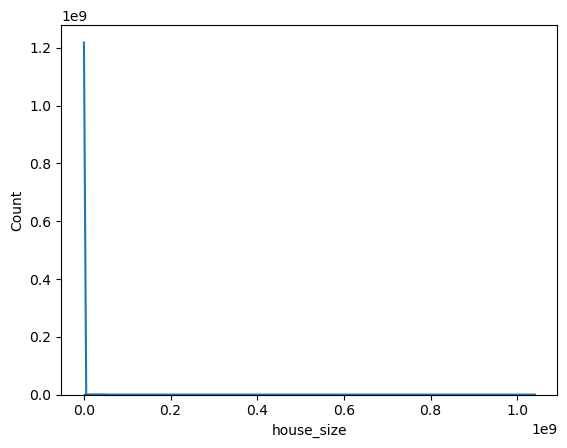

In [35]:
sns.histplot(df['house_size'], bins=20, kde = True) # shows extreme values for 'house_size'

<Axes: ylabel='house_size'>

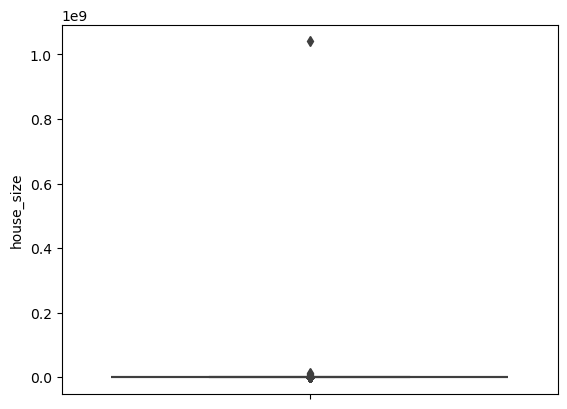

In [36]:
#hard to tell.  Look at boxplot
sns.boxplot(y='house_size', data=df)

In [37]:
#this was easier to pick up outliers.  
#check the max to see what numbers to manipulate
df['house_size'].max()


1040400400.0

In [38]:
# Check how many extreme values 

df[df['house_size'] >100000]


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category
2251,16919.0,for_sale,8250000.0,5.000000,6.000000,33.29,1940311.0,Culebra,Puerto Rico,775.0,1450112.0,0,High price
53614,75836.0,for_sale,489999.0,6.000000,3.000000,0.10,1692397.0,Linden,New Jersey,7036.0,400149.0,0,Middle price
113691,22611.0,for_sale,69999.0,1.000000,1.000000,2.80,974943.0,Port Chester,New York,10573.0,112714.0,0,Low price
136935,105654.0,for_sale,419000.0,3.000000,3.000000,9.50,1750467.0,Palenville,New York,12463.0,352836.0,0,Middle price
139105,45049.0,for_sale,140000.0,2.000000,2.000000,1.90,439425.0,Poughkeepsie,New York,12601.0,156244.0,0,Middle price
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042568,89501.0,sold,199000.0,3.275919,2.496373,11.74,1838374.0,San Jose,New Mexico,87565.0,511220.0,2022-02-11,Middle price
2042634,22415.0,sold,550000.0,4.000000,3.000000,7.65,406917.0,Espanola,New Mexico,87532.0,333169.0,2021-12-03,High price
2042723,52475.0,sold,215000.0,3.275919,2.496373,6.79,1954359.0,Vallecitos,New Mexico,87581.0,295772.0,2022-02-23,Middle price
2042749,3399.0,sold,225000.0,3.275919,2.496373,21.43,652508.0,Dilia,New Mexico,87711.0,933491.0,2022-04-01,Middle price


In [39]:
#clean df leaving these extremes out
df=df[df['house_size']<100000]

In [40]:
#check it
df['house_size'].max()

99999.0

### Create an average price per zip code column

In [41]:
# Create a 'med_price' column

med_price = df.groupby('zip_code')['price'].median().reset_index()
med_price.columns = ['zip_code', 'med_price']

In [42]:
pd.set_option('display.max_rows', None)

In [43]:
med_price.head(100)

,zip_code,med_price
0,601.0,92500.0
1,602.0,150000.0
2,603.0,187500.0
3,604.0,79900.0
4,605.0,161500.0
5,606.0,80000.0
6,610.0,140000.0
7,612.0,119900.0
8,613.0,566450.0
9,617.0,111000.0


these zip codes look off.  check this

In [44]:
# Check row where zip code is only 3 digits, here I took the first example 
# then I can see that these are in another country.  It sould be ok since addresses are complete.

df[df['zip_code'] ==601.0]

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,0,Middle price
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,0,Low price


### Plot the choropleth

In [45]:
# check the datatype of zipcode to make sure it is of string type

med_price['zip_code'] = med_price['zip_code'].astype(str)

In [46]:
df.dtypes

brokered_by       float64
status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
street            float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
Price category     object
dtype: object

In [47]:
df[df['state'] =='Alaska']

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category
1410303,10348.0,for_sale,210000.0,3.000000,3.000000,0.16,156680.0,Anchorage,Alaska,99501.0,1756.000,0,Middle price
1410304,82016.0,for_sale,375000.0,8.000000,7.000000,0.15,411761.0,Anchorage,Alaska,99501.0,3060.000,0,Middle price
1410305,53077.0,for_sale,125000.0,4.000000,2.000000,0.16,149505.0,Anchorage,Alaska,99501.0,748.000,0,Middle price
1410306,30827.0,for_sale,165000.0,1.000000,1.000000,0.26,204343.0,Anchorage,Alaska,99501.0,664.000,2004-10-15,Middle price
1410307,10348.0,for_sale,510000.0,11.000000,6.000000,0.16,1034293.0,Anchorage,Alaska,99501.0,4104.000,0,High price
1410308,82016.0,for_sale,369900.0,6.000000,3.000000,0.16,282332.0,Anchorage,Alaska,99501.0,2560.000,0,Middle price
1410309,37001.0,for_sale,635000.0,8.000000,4.000000,0.16,1776658.0,Anchorage,Alaska,99501.0,3840.000,2010-12-10,High price
1410310,30795.0,for_sale,207000.0,2.000000,2.000000,0.16,150536.0,Anchorage,Alaska,99501.0,1008.000,2004-12-06,Middle price
1410311,35033.0,for_sale,1395000.0,4.000000,4.000000,1.15,1403589.0,Anchorage,Alaska,99501.0,7144.000,0,High price
1410312,37001.0,for_sale,635000.0,8.000000,4.000000,0.16,1764682.0,Anchorage,Alaska,99501.0,3840.000,0,High price


In [48]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo,
    data = med_price,
    columns = ['zip_code', 'med_price'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Median Price").add_to(map)
folium.LayerControl().add_to(map)

map


### This is only showing dark gray (NaN values?). Try something else. 
### Create an average price per state code column using mean

In [49]:
# Create a 'ave_price' column

ave_price = df.groupby('state')['price'].mean().reset_index()
ave_price.columns = ['state', 'mean_price']

In [50]:
ave_price.head()

,state,mean_price
0,Alabama,295723.736422
1,Alaska,301778.898345
2,Arizona,472916.668614
3,Arkansas,272429.404051
4,California,915557.435131


In [51]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo,
    data = ave_price,
    columns = ['state', 'mean_price'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Average Price (mean)").add_to(map)
folium.LayerControl().add_to(map)

map


This choropleth map shows that the average real estate spendings take place in California, Hawaii, Montana, Colorado, Utah, New York, Massachusetts.

In [52]:
map.save('Mean_price_map.html')

### Try using median per state now and compare


In [53]:
# Create a 'median_price' column

median_price = df.groupby('state')['price'].median().reset_index()
median_price.columns = ['state', 'median_price']

In [54]:
median_price.head()

,state,median_price
0,Alabama,204900.0
1,Alaska,139000.0
2,Arizona,380000.0
3,Arkansas,164500.0
4,California,665000.0


In [55]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo,
    data = median_price,
    columns = ['state', 'median_price'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Average Price (Median)").add_to(map)
folium.LayerControl().add_to(map)

map


This choropleth map shows the median price per state, with the highest price homes sold in some of the same top states: California, Hawaii, followed by Massachusetts, Colorado, Utah, Nevada, Idaho, Oregon, and Washington.

In [ ]:
map.save('median_price_map.html')

### single family vs multi-family homes

In [56]:
# Trying to spot single family homes vs complex buildings, I will set the bedroom number to 10 
# new data set only includes condos/apartment complex buildings

Multi_home=df[df['bed'] >10]


In [57]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot = Multi_home[['bed','state']]
data_to_plot.head()


,bed,state
146,12.0,Puerto Rico
368,13.0,Puerto Rico
729,12.0,Puerto Rico
1047,12.0,Puerto Rico
1244,11.0,Puerto Rico


In [58]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['bed', 'state'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Multi-Family Homes").add_to(map)
folium.LayerControl().add_to(map)

map

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

### Clarifying questions answered by this analysis:

##### What geographic areas generate the most real estate revenue? 
California, Hawaii sell the highest prices, followed by Massachusetts, Colorado, Utah, Nevada, Idah, Montana, and New York

##### What states sell the lowest priced homes? 
North Dakota, South Dakota, Iowa, Wisconsin, Kanas, Missouri, Oklahoma, Arkansas, Louisiana, Mississippi, Alabama, Kentucky, Indiana, Ohio, Michigan, Maine, 

##### Additional Questions (but I cannot get the map to work above that could possibly answer these questions):
##### Do single family homes sell more in rural areas? 
##### Do multi-family homes/larger complexes make up more of the market in cities vs rural areas?

